### Probability density functions

Continuous variables
- Quantities that can take any value, not just discrete values

Probability density function (PDF, 확률질량함수) 
- 연속 변수의 값을 관찰 할 수 있는 가능성을 설명합니다.
- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable
- pdf 아래의 영역은 확률을 나타낸다. 
- 누적 분포 함수 (cdf)

Introduction to the Normal distribution
- Describes a continuous variable whose PDF has a single symmetric peak.
- 필요한 매개변수: 평균, 표준편차

### The Normal PDF
확률론과 통계학에서, 정규 분포(正規 分布, 영어: normal distribution) 또는 가우스 분포(Gauß 分布, 영어: Gaussian distribution)는 연속 확률 분포의 하나이다. 정규분포는 수집된 자료의 분포를 근사하는 데에 자주 사용되며, 이것은 중심극한정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다. 정규분포는 2개의 매개 변수 평균 (mu)과 표준편차 (sigma)에 대해 모양이 결정된다.


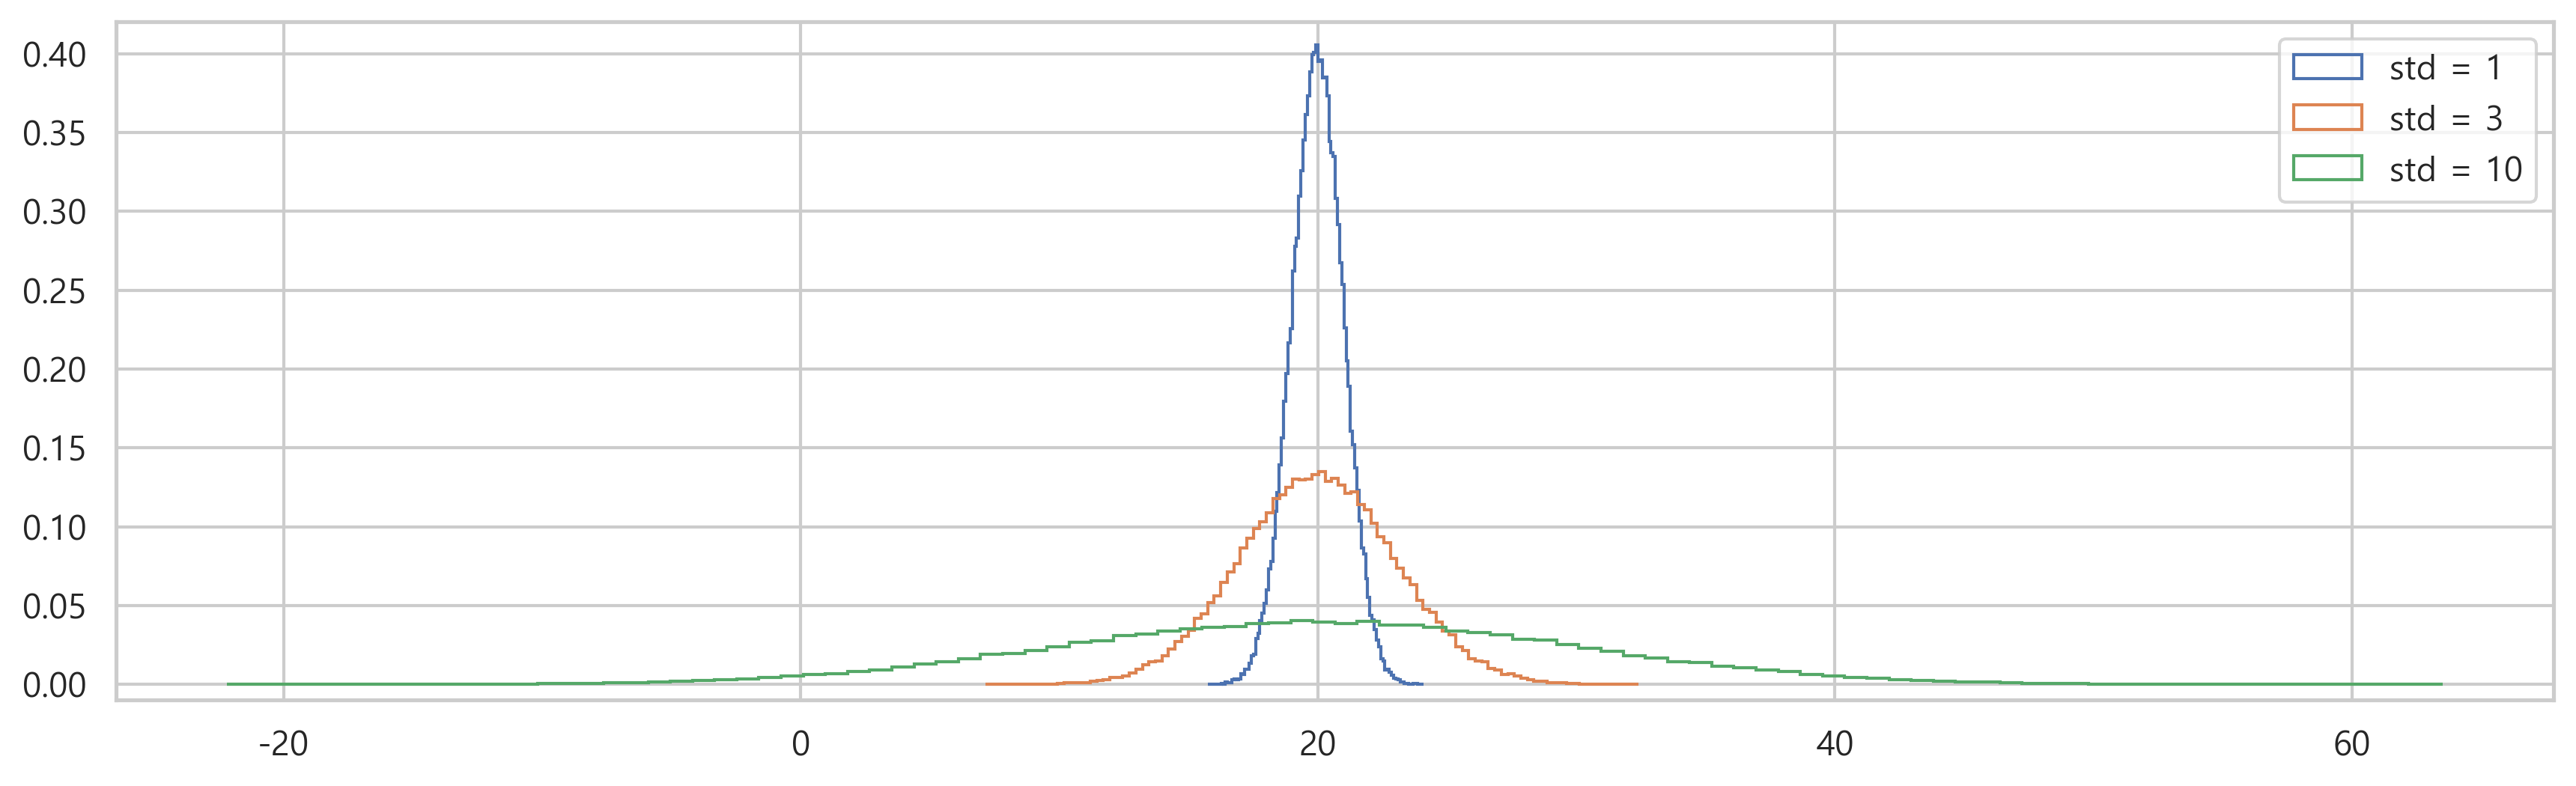

In [3]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF


In [4]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


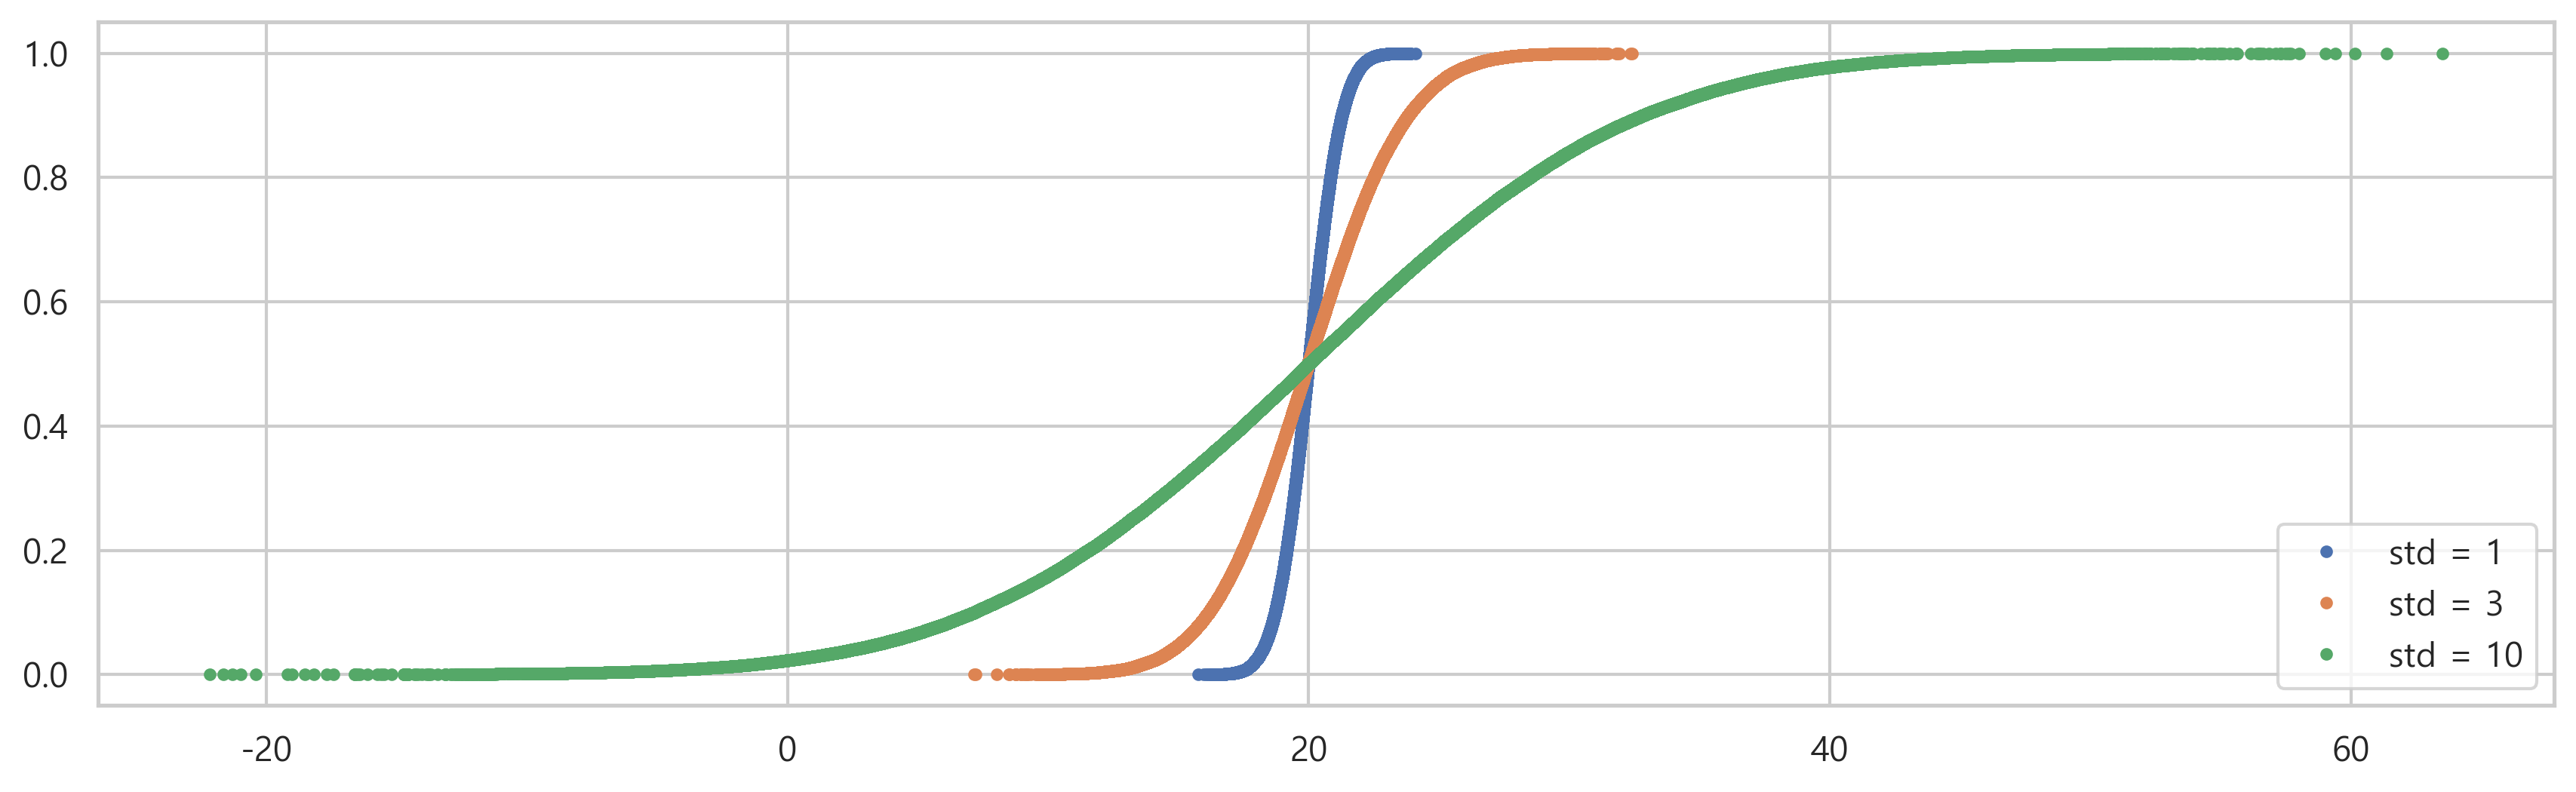

In [5]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker ='.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker ='.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker ='.', linestyle = 'none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass throuh the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.


The Normal distribution: Properties and warnings
- The Gaussian distribution
- 많은 통계 절차에 데이터에 대한 정규성 가정이 있음

In [13]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")

In [16]:
total_bill= tips['total_bill']

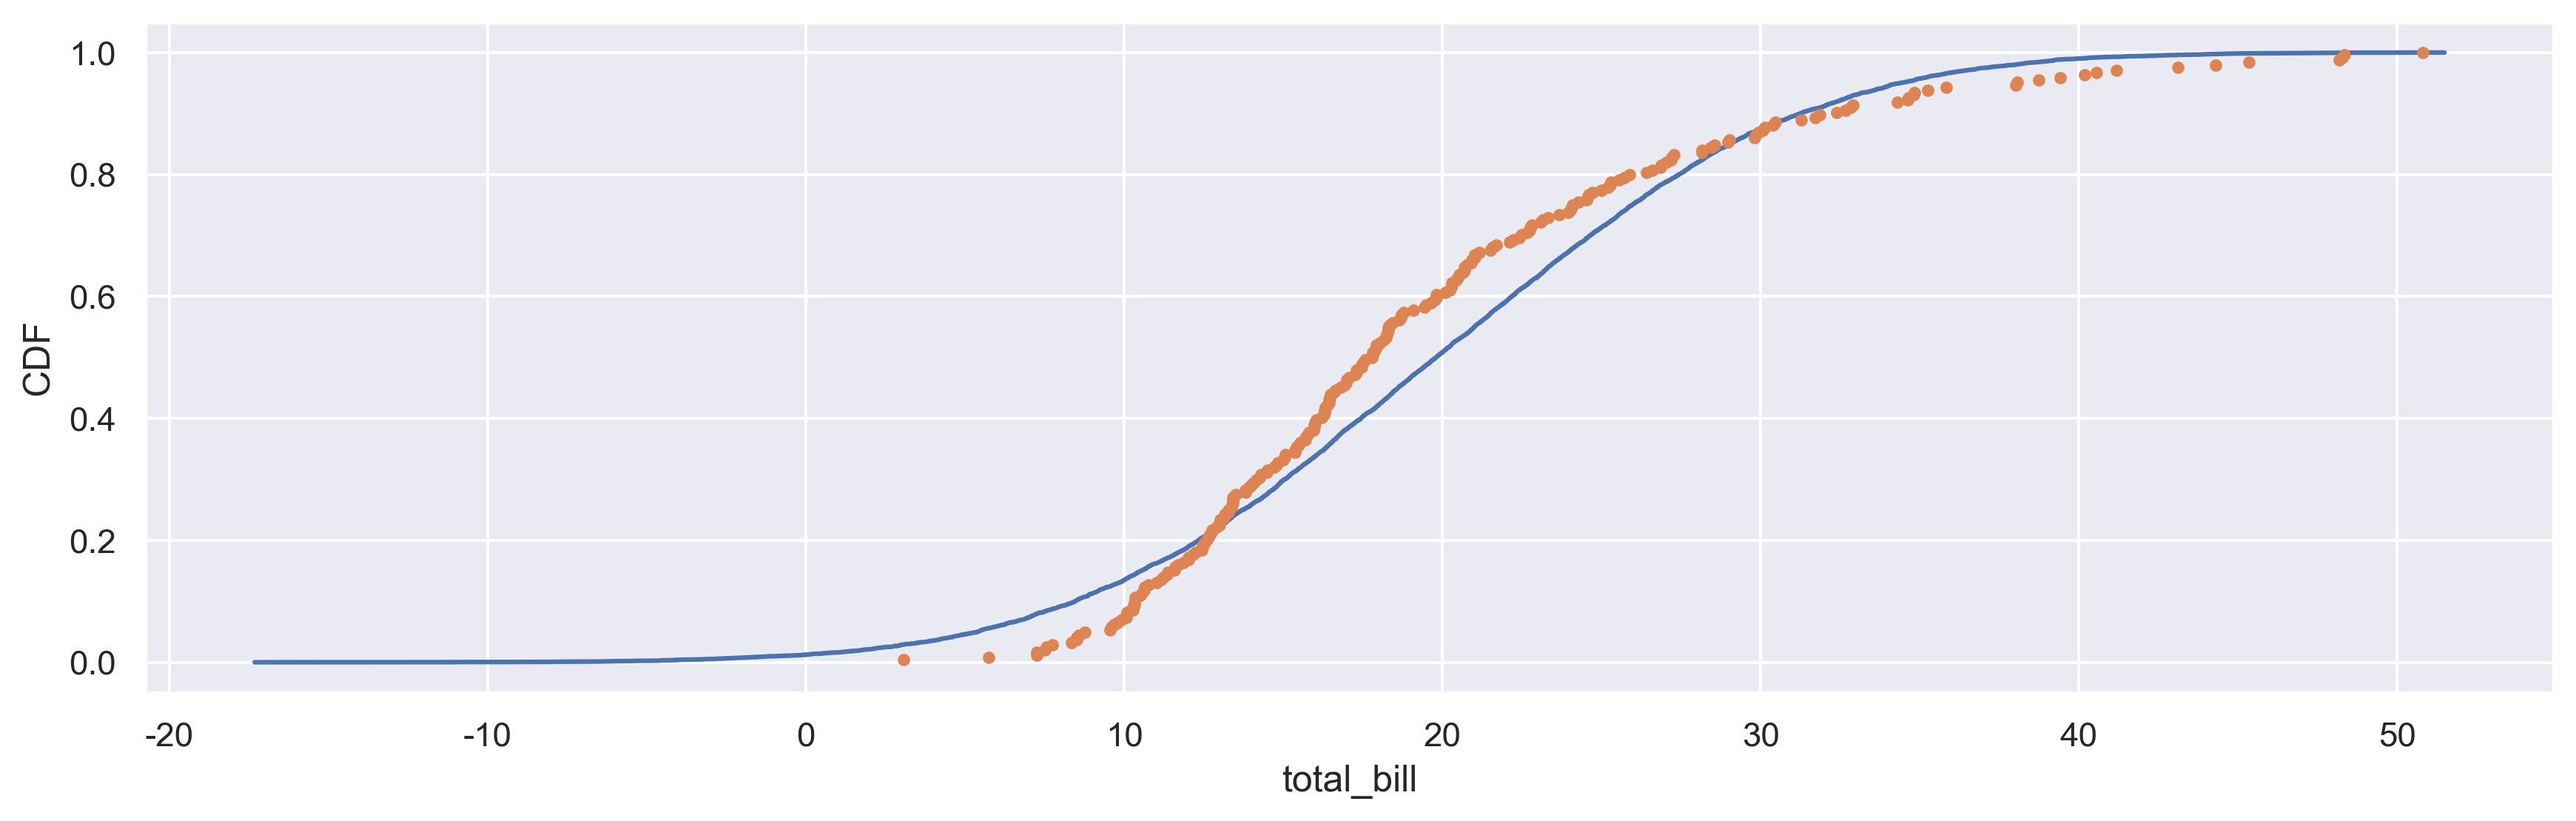

In [19]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(total_bill)
sigma = np.std(total_bill)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(total_bill)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('total_bill')
_ = plt.ylabel('CDF')
plt.show()


In [21]:
# total_bill이 10 이하일 확률
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction : prob
prob = np.sum(samples <= 10) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.134832
